# Linear Regression
### Notebook by [Kevin Huang](https://kevin8523.github.io/)

In [315]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

### Set up dataset into a dataframe to practice ML

In [316]:
# datasets
boston = load_boston()

In [317]:
# Set up data in a dataframe like a realworld problem
df = pd.DataFrame(data = boston.data)

In [318]:
# Name columns
df.columns = boston.feature_names

In [319]:
# Add Price feature >> Target or Y Variable
df["PRICE"] = boston.target

In [320]:
# Convert Chas to Categorical for practice
df['CHAS'] = df['CHAS'].replace([0], 'Charles River')
df['CHAS'] = df['CHAS'].replace([1], 'Tract Bounds River')

In [321]:
# Show values on a category
df["RAD"].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

***Description of Variables***

1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per 10,000
11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population
14. PRICE - Median value of owner-occupied homes in $1000's

***Summary Statistics***

In [322]:
print(df.shape)
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,Charles River,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,Charles River,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,Charles River,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,Charles River,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,Charles River,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Split the dataset: Train & test set

Only need to do this if you're manipulating the dataset (Filling missing data, transformation, etc). When splitting between the training and test set, you want to keep it separate

In [323]:
# Randomize dataset for split
df = df.reindex(np.random.permutation(df.index)) # randomizes index
df = df.sort_index() # sorts index 
print(df.shape)
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.03445,82.5,2.03,Charles River,0.415,6.162,38.4,6.2700,2.0,348.0,14.7,393.77,7.43,24.1
1,0.21161,0.0,8.56,Charles River,0.520,6.137,87.4,2.7147,5.0,384.0,20.9,394.47,13.44,19.3
2,0.04297,52.5,5.32,Charles River,0.405,6.565,22.9,7.3172,6.0,293.0,16.6,371.72,9.51,24.8
3,0.03548,80.0,3.64,Charles River,0.392,5.876,19.1,9.2203,1.0,315.0,16.4,395.18,9.25,20.9
4,12.80230,0.0,18.10,Charles River,0.740,5.854,96.6,1.8956,24.0,666.0,20.2,240.52,23.79,10.8


In [324]:
# Split dataset to train & test set
train = df.iloc[:354, :]
test = df.iloc[354:, :]
print(train.shape)
print(test.shape)

(354, 14)
(152, 14)


### Setup data for ML: Train set

***Missing Data*** <br/>
_Be sure to apply to both datasets_

In [325]:
## Taking care of missing data >> Array
# from sklearn.preprocessing import Imputer
# imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
# imputer = imputer.fit(X[:, 1:3])
# X[:, 1:3] = imputer.transform(X[:, 1:3])

In [326]:
## Taking care of missing data >> Dataframe
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='constant', fill_value='MISSING')
# train_imputed = imputer.fit_transform(train)
# train_imputed

***Feature Scaling*** <br/>
_Be sure to apply to both datasets_

In [327]:
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)
# sc_y = StandardScaler()
# y_train = sc_y.fit_transform(y_train)"""

***Encoding Categorical Variable*** <br/>
Be sure to use n-1 to avoid the dummy variable trap <br/>

In [328]:
# Create the Dummy Variables
train_cat = pd.get_dummies(train['CHAS'])
train_cat.head(10)

,Charles River,Tract Bounds River
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [329]:
# Add the dummy variables to the dataframe
# train.join(categorical_variables) # Alternate: joins on index
train = pd.concat([train,train_cat],axis=1)

In [330]:
# Drop the unnesscary columns to avoid the dummy variable trap
# axis=1: Columns ; axis=0: Rows
train.drop(['CHAS','Tract Bounds River'],axis=1,inplace=True)

In [331]:
# Rename the Categorical Columns
train.rename(columns = {'Charles River':'CHAS'},inplace = True)

In [332]:
# Reorder / Drop Columns
list(train.columns.values)
train = train[['CHAS',
 'CRIM',
 'ZN',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'PRICE']]

### Setup data for ML: Test set

***Repeat process for test set:***


In [333]:
# Create the Dummy Variables
test_cat = pd.get_dummies(test['CHAS'])
test_cat.head(10)
# Add the dummy variables to the dataframe
# train.join(categorical_variables) # Alternate: joins on index
test = pd.concat([test,test_cat],axis=1)
# Drop the unnesscary columns to avoid the dummy variable trap
# axis=1: Columns ; axis=0: Rows
test.drop(['CHAS','Tract Bounds River'],axis=1,inplace=True)
# Rename the Categorical Columns
test.rename(columns = {'Charles River':'CHAS'},inplace = True)
# Reorder / Drop Columns
list(test.columns.values)
test = test[['CHAS',
 'CRIM',
 'ZN',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'PRICE']]

### Merge data back together

In [334]:
# Append dataframe
df = train.append(test)
df.shape

(506, 14)

### Prep Data for Scikit & Apply ML

In [335]:
# Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [336]:
# Split for X and y as vectors
# : for the list >> [row selection, column seleciton]
X = df.iloc[:, :-1].values # [:, :-1] >> [all rows, all columns except last one]
y = df.iloc[:, 13].values # all rows and just column 13

In [337]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    random_state = 5,
                                                    shuffle = False
                                                   )
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


Depending on how you set up the data, will depend on the parameters for the train_test_split.

***If you did not randomizes the dataset beforehand, you should set shuffle to true (could have some bias in the preset order). If you did shuffle the data before hand, set shuffle to false***

***Apply ML***

In [338]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

In [339]:
# Instantiate Model
lm = LinearRegression()

# Fit data to model
lm.fit(X_train, y_train)

# Predict 
y_pred = lm.predict(X_test)

In [340]:
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(mse)

22.268447525889314


In [341]:
# Score
print(lm.score(X_train,y_train))
print(lm.score(X_test,y_test))

0.7317500398946561
0.7382994262101195


In [342]:
y_pred.shape

(152,)

***Visualize Data***

In [343]:
# Import Libraries
import matplotlib.pyplot as plt

Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

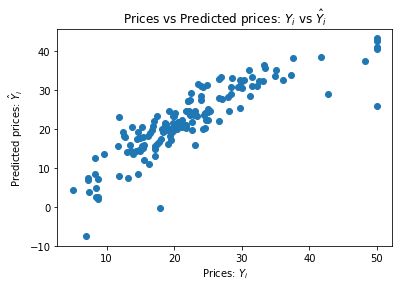

In [344]:
# Plot Visual
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

### Update Model by building optimal model using Backward Elimination

In [345]:
import statsmodels.formula.api as sm

In [346]:
X = df.iloc[:, :-1].values # [:, :-1] >> [all rows, all columns except last one]
y = df.iloc[:, 13].values # all rows and just column 13

In [347]:
X.shape

(506, 13)

***For Backwards Elimination in statsmodels, it doesn't take into account the b0 constant term. We need to add it manually by adding the array 1 to our X***

In [348]:
# np.append(arr=X
#          , values = np.ones(shape=(506,1)).astype(int)
#          , axis=1) # Puts array 1 at the END of the the array X
X_var = np.append(arr=np.ones(shape=(506,1)).astype(int)
         , values = X
         , axis = 1) # Flips it so array 1 is at the front of array X
print(X_var.shape)
X_var

(506, 14)


array([[1.0000e+00, 1.0000e+00, 3.4450e-02, ..., 1.4700e+01, 3.9377e+02,
        7.4300e+00],
       [1.0000e+00, 1.0000e+00, 2.1161e-01, ..., 2.0900e+01, 3.9447e+02,
        1.3440e+01],
       [1.0000e+00, 1.0000e+00, 4.2970e-02, ..., 1.6600e+01, 3.7172e+02,
        9.5100e+00],
       ...,
       [1.0000e+00, 1.0000e+00, 3.2264e-01, ..., 2.1200e+01, 3.7825e+02,
        1.6900e+01],
       [1.0000e+00, 1.0000e+00, 6.3796e-01, ..., 2.1000e+01, 3.8002e+02,
        1.0260e+01],
       [1.0000e+00, 1.0000e+00, 1.0233e+01, ..., 2.0200e+01, 3.7970e+02,
        1.8030e+01]])

In [349]:
# Optimal Features for model >> Statisically sig. Variables
X_opt = X_var[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]]

In [350]:
# Create the model again since we're using a diff library
# Initialize the model
regressor_OLS = sm.OLS(endog=y , exog=X_opt).fit()

In [351]:
# Backwards Elim process
# >> Remove highest p-value until < .05 or satisfied
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 13 Oct 2018   Prob (F-statistic):          6.72e-135
Time:                        18:09:34   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.1462      5.153      7.597      0.000      29.023      49.270
x1            -2.6867      0.862     -3.118      0.002      -4.380      -0.994
x2            -0.1080      0.033     -3.287      0.001      -0.173      -0.043
x3             0.0464      0.014      3.382      0.001       0.019       0.073
x4             0.0206      0.061      0.334      0.738      -0.100       0.141
x5           -17.7666      3.820     -4.651      0.000     -25.272     -10.262
x6             3.8099      0.418      9.116      0.000       2.989       4.631
x7             0.0007      0.013      0.052      0.958      -0.025       0.027
x8            -1.4756      0.199     -7.398      0.000      -1.867      -1.084
x9             0.3060      0.066      4.613      0.000       0.176       0.436
x10           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
x11           -0.9527      0.131     -7.283      0.000      -1.210      -0.696
x12            0.0093      0.003      3.467      0.001       0.004       0.015
x13           -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [352]:
# Optimal Features for model >> Statisically sig. Variables
X_opt = X_var[:,[0, 1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 13]]

# Create the model again since we're using a diff library
# Initialize the model
regressor_OLS = sm.OLS(endog=y , exog=X_opt).fit()

# Begin Backwards Elimination >> Remove highest p-value
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sat, 13 Oct 2018   Prob (F-statistic):          5.54e-137
Time:                        18:09:34   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.0599      5.124      7.622      0.000      28.992      49.128
x1            -2.7187      0.854     -3.183      0.002      -4.397      -1.040
x2            -0.1084      0.033     -3.307      0.001      -0.173      -0.044
x3             0.0458      0.014      3.390      0.001       0.019       0.072
x4           -17.3760      3.535     -4.915      0.000     -24.322     -10.430
x5             3.8016      0.406      9.356      0.000       3.003       4.600
x6            -1.4927      0.186     -8.037      0.000      -1.858      -1.128
x7             0.2996      0.063      4.726      0.000       0.175       0.424
x8            -0.0118      0.003     -3.493      0.001      -0.018      -0.005
x9            -0.9465      0.129     -7.334      0.000      -1.200      -0.693
x10            0.0093      0.003      3.475      0.001       0.004       0.015
x11           -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Using updated variables, re-run regression for the optimal model

In [353]:
# Update the dataframe to only select sig. variables
df_v2 = df.iloc[:, :]
df_v2 = df_v2.drop(['INDUS','AGE']
          ,axis=1
          ,inplace=False)

In [354]:
# Confirm correct Columns removed
df_v2.head()

,CHAS,CRIM,ZN,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,1,0.03445,82.5,0.415,6.162,6.2700,2.0,348.0,14.7,393.77,7.43,24.1
1,1,0.21161,0.0,0.520,6.137,2.7147,5.0,384.0,20.9,394.47,13.44,19.3
2,1,0.04297,52.5,0.405,6.565,7.3172,6.0,293.0,16.6,371.72,9.51,24.8
3,1,0.03548,80.0,0.392,5.876,9.2203,1.0,315.0,16.4,395.18,9.25,20.9
4,1,12.80230,0.0,0.740,5.854,1.8956,24.0,666.0,20.2,240.52,23.79,10.8


In [355]:
# Split for X and y as vectors
# : for the list >> [row selection, column seleciton]
X = df_v2.iloc[:, :-1].values # [:, :-1] >> [all rows, all columns except last one]
y = df_v2.iloc[:, 11].values # all rows and just column 13

In [356]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    random_state = 5,
                                                    shuffle = False
                                                   )
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Instantiate Model
lm = LinearRegression()

# Fit data to model
lm.fit(X_train, y_train)

# Predict 
y_pred = lm.predict(X_test)

(354, 11)
(152, 11)
(354,)
(152,)


In [357]:
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(mse)

# Score
print(lm.score(X_train,y_train))
print(lm.score(X_test,y_test))

21.487506228669723
0.729860152720313
0.7474771107047828
